In [1]:
%matplotlib inline
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib
from bokeh.io import show, output_file
from bokeh.models import Plot, Range1d, MultiLine, Circle, HoverTool, TapTool, BoxSelectTool, WheelZoomTool, ColumnDataSource, LabelSet
from bokeh.models.graphs import from_networkx, NodesAndLinkedEdges, EdgesAndLinkedNodes
from bokeh.palettes import Spectral4


In [2]:
path_models = '.\\word2vec_models'

In [3]:
pwd

'G:\\PROj\\NLP\\JM_caste'

In [4]:
wvm = Word2Vec.load(path_models+'\\'+'IN-indianexpress-india_with_phraser').wv

In [5]:
vocab = wvm.vocab
all_words = [x for x in vocab.keys()]

In [26]:
from util_kw import lower_caste_keywords, negative_aspect, recurse_add_

In [40]:
negative_aspect

['poor', 'violence', 'disease', 'unhealthy', 'incident', 'crime']

In [41]:
g1 = nx.Graph()
for word in lower_caste_keywords+positive_aspect:
    if word in all_words:
        recurse_add_(word, wvm, g1, depth=2, topn=5)
    else:
        print ("Word "+word+" not found.")

In [28]:
matplotlib.rcParams['figure.figsize'] = (17, 12)

In [47]:
g1.nodes()

NodeView(('patidar', 'patidars', 'mevani', 'patidar_community', 'andolan_samiti', 'dalit', 'patels', 'marathas', 'dalits', 'tribals', 'adivasis', 'maratha', 'maratha_community', 'caste', 'obc', 'castes', 'amhindu', 'amtypical', 'hindu_ignorant', 'satanic', 'faschist', 'humanjul', 'demean', 'josephmay', 'preachings', 'offended', 'ironical', 'darmay', 'hindrance_truth', 'amhinduism', 'self_centered', 'amand', 'hogs_hinduism', 'pita', 'mein_nahi', 'gya', 'unki', 'rajneeti', 'hamesha', 'hating', 'replyiivanapr', 'mmohammad_darmay', 'scheduled_castes', 'scheduled_tribes', 'backward_classes', 'sc_st', 'scst', 'scheduled_tribe', 'sts', 'backward_class', 'scheduled_caste', 'obc_category', 'socially_educationally', 'obcs', 'backward_castes', 'upper_castes', 'dalits_obcs', 'communities', 'irrespective_religion', 'lower_caste', 'basis_religion', 'peace_loving', 'creed', 'respect_religions', 'upper_caste', 'minority_community', 'dalit_community', 'worshipped', 'worship', 'holy', 'sacred', 'revered

In [43]:
plot = Plot(plot_width=1600, plot_height=1000, x_range=Range1d(-1.1,1.1), y_range=Range1d(-1.1,1.1))
plot.title.text = "Graph Interaction Demonstration"

plot.add_tools(HoverTool(tooltips=[("word", "@word")]), TapTool(), BoxSelectTool(), WheelZoomTool())

graph_renderer = from_networkx(g1,nx.spring_layout, scale=1, center=(0,0))

graph_renderer.node_renderer.glyph = Circle(size=15, fill_color=Spectral4[0])
graph_renderer.node_renderer.selection_glyph = Circle(size=15, fill_color=Spectral4[2])
graph_renderer.node_renderer.hover_glyph = Circle(size=15, fill_color=Spectral4[1])
graph_renderer.node_renderer.data_source.data['word'] = list(g1.nodes())

graph_renderer.edge_renderer.glyph = MultiLine(line_color="#CCCCCC", line_alpha=0.8, line_width=5)
graph_renderer.edge_renderer.selection_glyph = MultiLine(line_color=Spectral4[2], line_width=5)
graph_renderer.edge_renderer.hover_glyph = MultiLine(line_color=Spectral4[1], line_width=5)

graph_renderer.selection_policy = NodesAndLinkedEdges()

pos = graph_renderer.layout_provider.graph_layout

In [63]:
xvals, yvals = zip(*pos.values())
csource = ColumnDataSource(data=dict(x=list(xvals), y=list(yvals), words=pos.keys()))

ValueError: expected an element of ColumnData(String, Seq(Any)), got {'x': [0.036528593738381319, 0.036089261600802912, 0.067740917407635146, 0.053230891001911716, 0.033246526679161559, 0.0038083123376959596, 0.09483692881446143, 0.0019708373963640991, -0.014514385535105701, -0.088749030635672577, 0.046056256588587821, 0.028019542053742408, 0.041335703455421639, -0.0051149815878062509, -0.02875768659198339, -0.018710213351018256, 0.47405314215156164, 0.3873132875938653, 0.5207205897687438, 0.46039207627536416, 0.53204174136557036, 0.53329542896875692, 0.44224943911685322, 0.37107286659415245, 0.4682161314938193, 0.43548445019508575, 0.48287028342055849, 0.062566762869021547, -0.052877874446837843, 0.058835631696815244, 0.039523674400856891, 0.16966410316612401, 0.076970669873490577, 0.88083647894651707, 0.93051728556954494, 0.93447592409950675, 0.80964180033761368, 0.87567110258158887, 0.90907247789702517, 0.29417703963904335, 0.30979010591487538, 0.32530492850417886, -0.30063464125724193, -0.28595100022091369, -0.24354483102274843, -0.36026468591259908, -0.3245068599075584, -0.30995113292493892, -0.28648817864009379, -0.23338283477799726, -0.36523802541915218, -0.21972811078633833, -0.3020269156856264, -0.10708204129943009, 0.048460081975445601, 0.088560260613277278, 0.097714232989634109, -0.12471312997712689, 0.57341627029842768, 0.44722763611147681, 0.6348798084922026, 0.63156678646809861, 0.64567098542243428, 0.62707650688294359, 0.23329188926325189, 0.29081783633649438, 0.28942302040833595, 0.55031928291938237, 0.59203777923718071, 0.57911029070244402, 0.61281457191692557, 0.60754470870099431, 0.56222252373866788, 0.61043396570314523, 0.61045445989644209, 0.62400964840897655, 0.63452247052244148, 0.13049056599845632, 0.123110980501869, 0.1446383995449376, 0.16371418186386255, -0.16324628853097456, -0.25338255740054944, -0.1958301556133718, -0.3180640489649656, -0.27616502730142178, -0.37800080850513557, -0.2183350863606075, -0.36513931924755494, -0.3710026405894814, -0.34277560327934609, -0.40699610358467475, -0.16068631585570772, -0.19667617416228772, -0.042162415042018085, -0.21966457762182062, -0.22093163542214175, -0.28353582097729957, -0.24307384581577973, 0.19768044781155547, 0.21792259902076916, 0.14680697882252364, 0.23889188387859037, 0.24774205197437668, 0.13703308419522783, -0.16825294476528835, -0.20964485550680773, -0.22880475007066525, -0.17829926854064329, -0.21976292879814799, 0.075415982070346499, 0.10390009213078465, 0.12178168991979166, -0.046923634482328558, -0.021802118382487249, -0.099882279157136031, -0.00058374569311606995, -0.019480943795459903, -0.042123966733642278, -0.24352478686679496, -0.28217887629946786, -0.2735580956200851, -0.21415847792472337, -0.24787549509640924, -0.21964189305902213, -0.60169919175949249, -0.58750180457670065, -0.54989974688544141, -0.67812217230981353, -0.60970229933503395, -0.64360727728564426, -0.70335164952268037, -0.75850521442515739, -0.73076423679813951, -0.74664625834723009, -0.75125055269754171, 0.058655928238756462, 0.063450799938794281, 0.044054413971389039, 0.040887763059899725, 0.063834824772287496, 0.086571537253747541, -0.79627930050396445, -0.81289515243685517, -0.78956951141485165, -0.6430096129918258, -0.70473089427782765, -0.70526367292290992, -0.70520700248311663, -0.69155291453484602, -0.52372830500841638, 0.31783490004367854, 0.35887379336852793, 0.2057559463988676, 0.37860614690142758, 0.37878730415695999, 0.38596134613690841, -0.00365362093041809, -0.017909129954754837, -0.049856144907647823, 0.0044949923604424152, 0.081894391105262199, -0.043619918701735774, 0.30168170378420633, 0.36812715279789621, 0.33547273505425912, 0.33790120681173563, 0.30270290580813541, 0.3652826799349107, 0.34859933041659258, 0.16724279481731388, 0.20333038625019845, 0.20101700556992128, 0.2203074259163123, 0.21880931173189319, -0.20387369527251706, -0.25156549831212172, -0.078921375907718333, -0.26803215976164646, -0.25916132477439646, -0.23624030076459687, 0.030922283698873541, -0.035518170987632505, -0.027404350136953751, -0.035036618499765505, -0.12129966924962188, -0.065089920236333462, 0.055652977311284157, -0.02589837722416112, -0.03559062218333911, -0.39757615324477302, -0.45341446862285023, -0.22971051166486239, -0.46640132310129706, -0.4699337068904399, -0.1056455511820313, -0.11212325192061837, 0.034551622706927923, -0.13294656520094367, -0.091713550836495183, -0.26225229359267138, -0.30825767237100171, -0.25782296364175333, -0.27889296492458115, -0.29836852066104402, -0.15472917726078664, -0.11834455570159384, -0.17927662504859862, -0.14945146470584192, 0.15157558419800457, 0.17161711953371328, 0.21658653151590535, 0.20891892603434498, 0.2295350967466559, -0.001396490947060681, 0.012541796120240607, 0.014231939405253965, -0.09506119706657129, 0.080820137217735719, 0.027538502823881816, 0.004739596830668576, 0.086555196909834195, 0.10588170689968719, 0.11934878174258416, -0.19445350806373399, -0.25552243747012354, -0.25046395590264692, -0.22005539736028285, -0.23930565379932908], 'y': [0.047930553565485465, 0.098762314009336785, 0.00084203981055057983, 0.070196006298054781, -0.0099735452658791281, 0.093959155140330972, 0.080603729449808342, 0.17095244151844488, 0.13632900745051876, 0.19842836680512546, 0.1298615327578368, 0.11249282779077688, 0.15096349222181335, 0.15264027161582222, 0.20705824346638277, 0.21425288065212481, -0.60391375070786435, -0.62477436935505493, -0.64727708041345788, -0.52466435703989645, -0.60816841124270637, -0.62985766700184054, -0.66158970132165396, -0.67483781557752331, -0.70513361710790845, -0.69653712020790182, -0.67850107828881778, -0.69200501484286214, -0.66439634020956917, -0.75469167868189102, -0.742241463337175, -0.68321320261784935, -0.74020006246621972, 0.26996997971963149, 0.28304623423069747, 0.25856978456344321, 0.24860177206099235, 0.3033802547231817, 0.29994844113051167, -0.65643609070883491, -0.70260167046879474, -0.66103034320712717, 0.23032082576822877, 0.24114485995946758, 0.22099428651726022, 0.23212034574798526, 0.23498101381057682, 0.25689154344290616, 0.27660510334763871, 0.23940694728701792, 0.26378715127010327, 0.27683755991724263, 0.19398612538268328, 0.22580354934770255, 0.224205442385422, 0.20736398984984722, 0.25169496120730622, 0.24241456583488577, 0.24908474395238364, 0.24088725878338238, 0.26883443375910615, 0.23584805215137639, 0.25135051310764156, 0.28677726531724096, 0.22532467792020519, 0.22464729180619789, 0.25157349612544883, 0.32319150145995845, 0.3571552003781101, 0.37928551433018493, 0.34434875103366253, 0.37306533494462812, 0.18248009767153361, 0.16177937362457159, 0.13887954239867711, 0.1873659012700514, 0.16545533823181571, -0.75658385347607726, -0.82055744444780798, -0.82273971305532123, -0.81204589188137433, 0.2660837707407549, 0.33230174324565076, 0.28825129407522199, 0.34250050547390137, 0.30202860400009257, 0.37718800035656647, 0.2376086382448738, 0.39311598711719148, 0.40828321132559103, 0.38327070425042975, 0.42850328302746193, 0.084018503771896305, 0.050975247152278254, -0.03975896791260939, 0.081733014578793423, 0.060245912078762648, 0.31778878999806376, 0.34577732450443721, -0.30710719909146705, -0.36575999940119186, -0.23279496927996271, -0.36235714024388899, -0.34346090413123037, -0.24117723912557085, -0.66975120740635541, -0.71374388672444655, -0.69851049209433069, -0.72053983207729644, -0.67357052583465038, -0.15606607365845446, -0.19204074752855413, -0.16667154414805344, -0.14906573128746656, -0.219620276706679, -0.016185713275541028, -0.20768388581937042, -0.19907902603198249, -0.21469305962289628, -0.78139321364488601, -0.81574593686160013, -0.84424928046422787, -0.69981281852286803, -0.83732176703901062, -0.80998623557577465, -0.43967103389253115, -0.4836418130437849, -0.44561369193473271, -0.44624328616539383, -0.48303775099593349, -0.39472530417718016, -0.36837806014493124, -0.38006934951938559, -0.33311081426829214, -0.43343816653249451, -0.34803710198897692, 0.93499157121693277, 0.86817621741141748, 0.84817637707615789, 0.99608633126425183, 1.0, 0.9935646557829424, -0.48037257787678733, -0.46086090667283586, -0.42890202823057938, 0.1063136471700129, 0.10966528255955847, 0.088996347467069595, 0.1305441799019437, 0.072036868041427907, 0.1476568398651012, -0.14656319705563928, -0.11256363823570302, -0.20064837394998497, -0.15772697037867511, -0.11968546545883245, -0.13880060880174058, 0.61658766665753206, 0.67345106162950685, 0.65171080757632804, 0.68238117493171602, 0.53991616561012445, 0.67255237011656077, -0.19112438686802544, -0.20042786613302738, -0.22971339633062743, -0.21047264069115615, -0.2301842980844078, -0.2573662555484415, -0.2761531829701413, 0.47022741235047683, 0.48183946901131441, 0.44111541899567414, 0.46004251615005287, 0.43361226631299093, -0.32159713195667283, -0.34094474751296372, -0.28894461087638246, -0.32795288198354094, -0.36138198203258465, -0.3728994300563846, -0.2576359849418407, -0.28005490900154606, -0.27167942048158233, -0.30066940497858602, -0.32855927768897869, -0.3529138107974984, -0.29807502677141706, -0.31387302601958528, -0.37706741609945044, 0.20694555105278079, 0.17428714270775766, 0.28274990038376735, 0.19849081622030168, 0.22468221511754305, 0.37924512121948672, 0.44958003117054218, 0.37394018215855968, 0.44415052543244826, 0.44503644149521426, 0.43587065461130425, 0.49202783783677706, 0.50714803509363438, 0.50722981715486803, 0.51213642934423753, 0.13055199260679962, 0.1338579228129233, 0.14080264636963047, 0.16105536284576022, 0.42514650633459999, 0.49368750604320821, 0.41780385330065739, 0.48723490770844802, 0.46116807964076562, 0.2947324585532396, 0.37693105385376935, 0.34153550301269664, 0.14412648708499487, 0.38544681560818184, 0.4360651743352213, 0.44277543205574998, 0.45108111221050834, 0.43950208249045752, 0.41893245598069356, 0.01949979090852345, -0.0064555190077109845, -0.023733599837483757, -0.033849459183894426, -0.041520152500311949], 'words': dict_keys(['patidar', 'patidars', 'mevani', 'patidar_community', 'andolan_samiti', 'dalit', 'patels', 'marathas', 'dalits', 'tribals', 'adivasis', 'maratha', 'maratha_community', 'caste', 'obc', 'castes', 'amhindu', 'amtypical', 'hindu_ignorant', 'satanic', 'faschist', 'humanjul', 'demean', 'josephmay', 'preachings', 'offended', 'ironical', 'darmay', 'hindrance_truth', 'amhinduism', 'self_centered', 'amand', 'hogs_hinduism', 'pita', 'mein_nahi', 'gya', 'unki', 'rajneeti', 'hamesha', 'hating', 'replyiivanapr', 'mmohammad_darmay', 'scheduled_castes', 'scheduled_tribes', 'backward_classes', 'sc_st', 'scst', 'scheduled_tribe', 'sts', 'backward_class', 'scheduled_caste', 'obc_category', 'socially_educationally', 'obcs', 'backward_castes', 'upper_castes', 'dalits_obcs', 'communities', 'irrespective_religion', 'lower_caste', 'basis_religion', 'peace_loving', 'creed', 'respect_religions', 'upper_caste', 'minority_community', 'dalit_community', 'worshipped', 'worship', 'holy', 'sacred', 'revered', 'massacred', 'killing_innocent', 'sacrificed_lives', 'oppression', 'pelt_stones', 'gau_mata', 'muzzies', 'spewing', 'gober', 'minority', 'minorities', 'scs_sts', 'dalits_tribals', 'disadvantaged', 'weaker_sections', 'minority_communities', 'marginalised', 'socially_economically', 'sections_society', 'downtrodden', 'muslims_christians', 'parsis', 'religions', 'christians', 'christians_muslims', 'obc_quota', 'demand_reservation', 'compassion', 'humanity', 'values', 'mankind', 'diversity', 'tolerance', 'prejudices', 'caste_system', 'replyssamuel_johnsonmay', 'pseudo', 'coexistence', 'beliefs', 'belief', 'hinduism', 'caring', 'intelligent', 'respectful', 'talented', 'educated', 'empathy', 'pmyour', 'moron', 'pmwhat', 'replyss', 'amwhy', 'chaddi', 'treatment', 'patients', 'medication', 'patient', 'medical_treatment', 'physiotherapy', 'medicine', 'medicines', 'therapy', 'medical', 'liver', 'treated', 'treat', 'treating', 'suffering', 'admitted', 'care', 'clinical', 'doctors', 'transplant', 'healthcare', 'health_care', 'health_facilities', 'resource', 'nutrition', 'hygiene', 'younger_sister', 'ruby', 'maternal_uncle', 'bai', 'elder_sister', 'anjana', 'parents_siblings', 'companion', 'rabbi', 'widowed', 'grandchildren', 'grandparents', 'carpenter', 'bablu', 'bibi', 'irfan', 'begum', 'fatima', 'irshad', 'eldest', 'survived_wife', 'uncles', 'siblings', 'elder', 'sister', 'daughter', 'uncle', 'mother', 'grandmother', 'husband', 'cousin', 'elder_brother', 'younger_brother', 'brother', 'two_sons', 'father', 'elder_son', 'relative', 'friend', 'lifestyle', 'diabetes', 'healthy', 'exposure', 'addiction', 'happiness', 'profound', 'prosperity', 'immense', 'future_generations', 'survival', 'sustain', 'overcome', 'survive', 'exploit', 'dignified', 'human_beings', 'meaningful', 'wisdom', 'economic_development', 'economic_growth', 'sustainable', 'socio_economic', 'sustainable_development', 'peace_prosperity', 'prosperous', 'progress_prosperity', 'lasting_peace', 'economic_prosperity', 'economically', 'aspiration', 'development_prosperity', 'inclusive_growth', 'bridging', 'peace_stability', 'indo_pacific', 'stability', 'regional_peace', 'regional_cooperation'])}

In [64]:
source = ColumnDataSource(data=dict(height=[66, 71, 72, 68, 58, 62],
                                    weight=[165, 189, 220, 141, 260, 174],
                                    names=['Mark', 'Amir', 'Matt', 'Greg',
                                           'Owen', 'Juan']))
xvals[0]
#labels = LabelSet(x='x', y='y', text='words', source=csource)

0.036528593738381319

In [56]:


plot.renderers.append(graph_renderer)
#plot.renderers.append(labels)

output_file("maybe_graphs.html")
show(plot)

In [29]:
topics = [x for x in nx.connected_component_subgraphs(g1)]
print (len(topics))

8


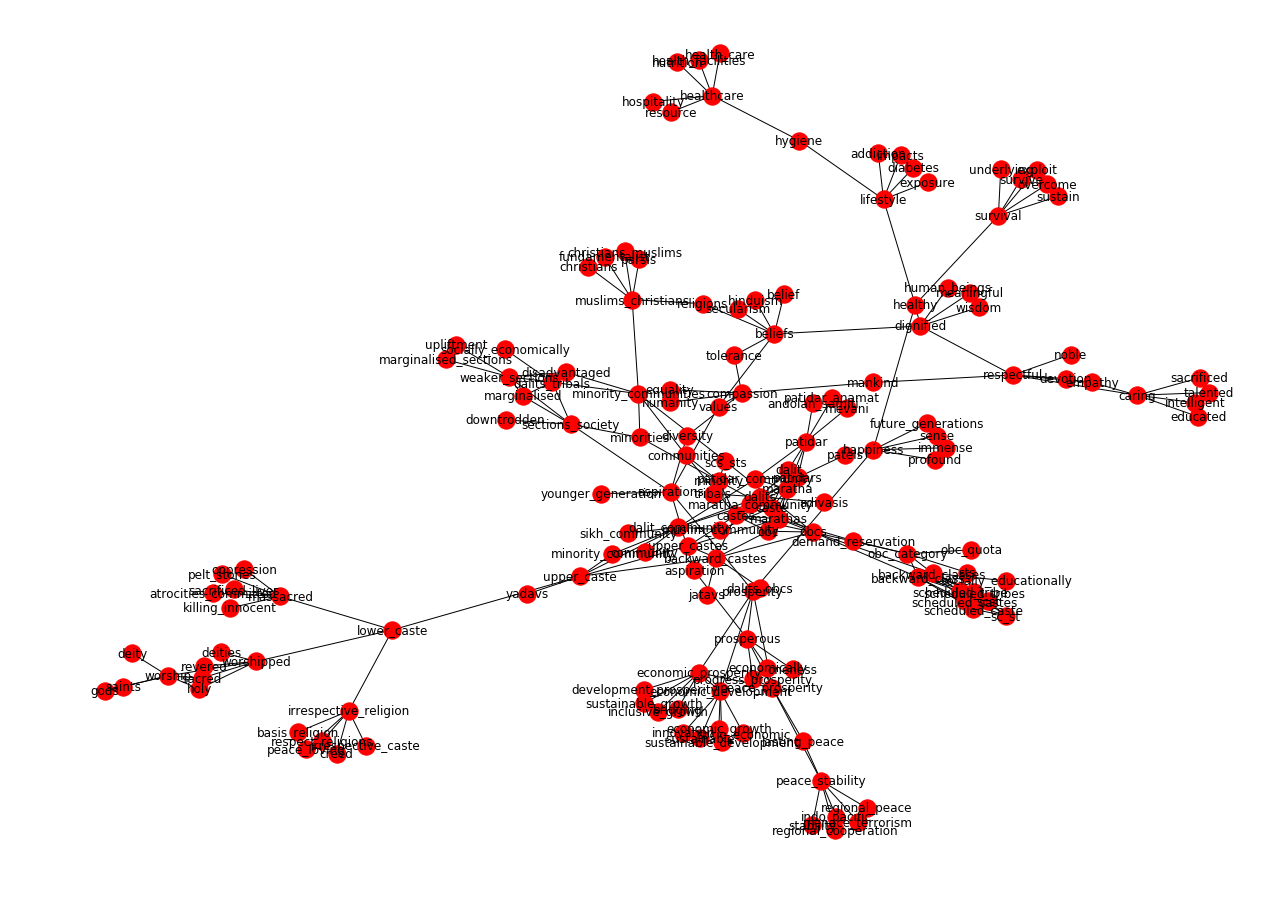

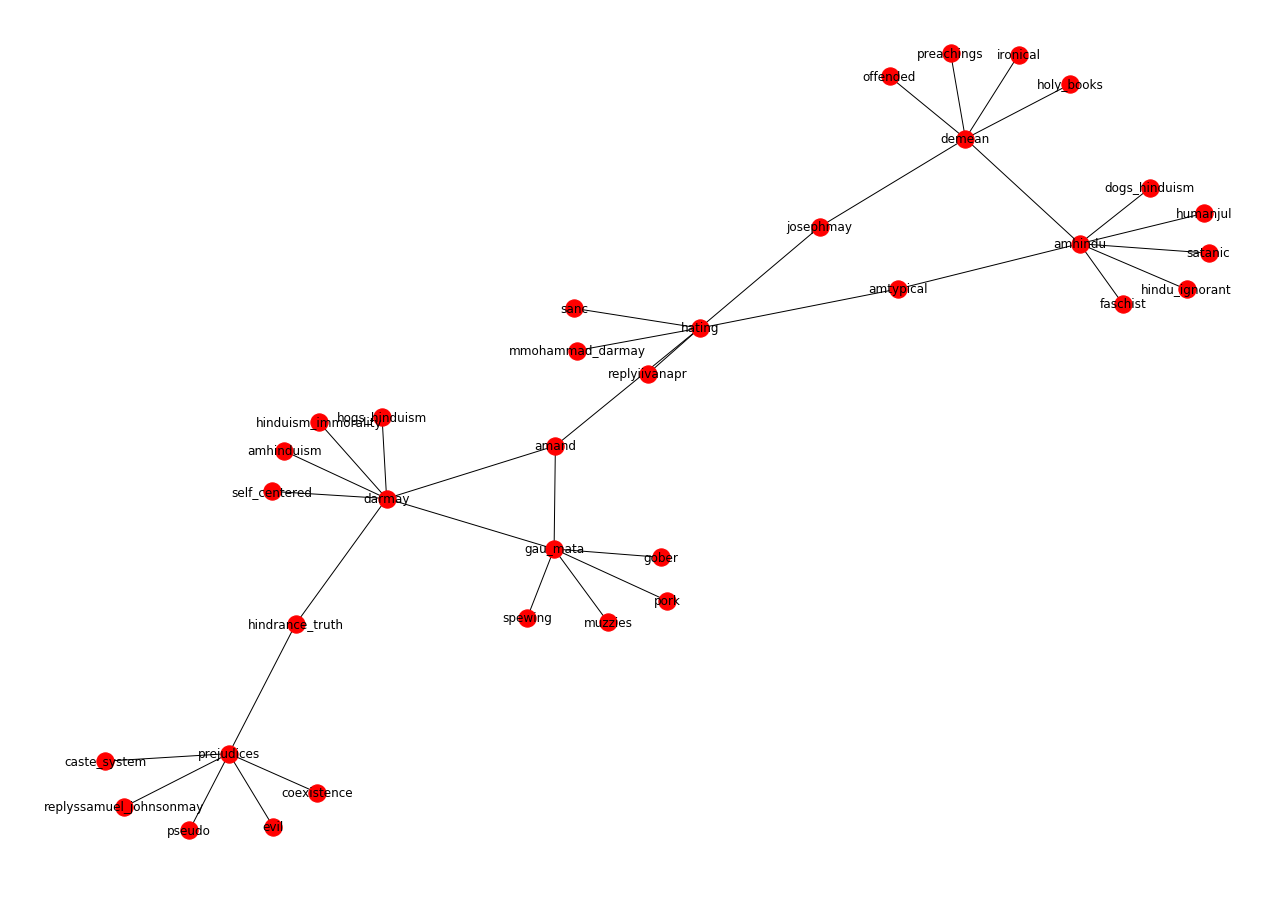

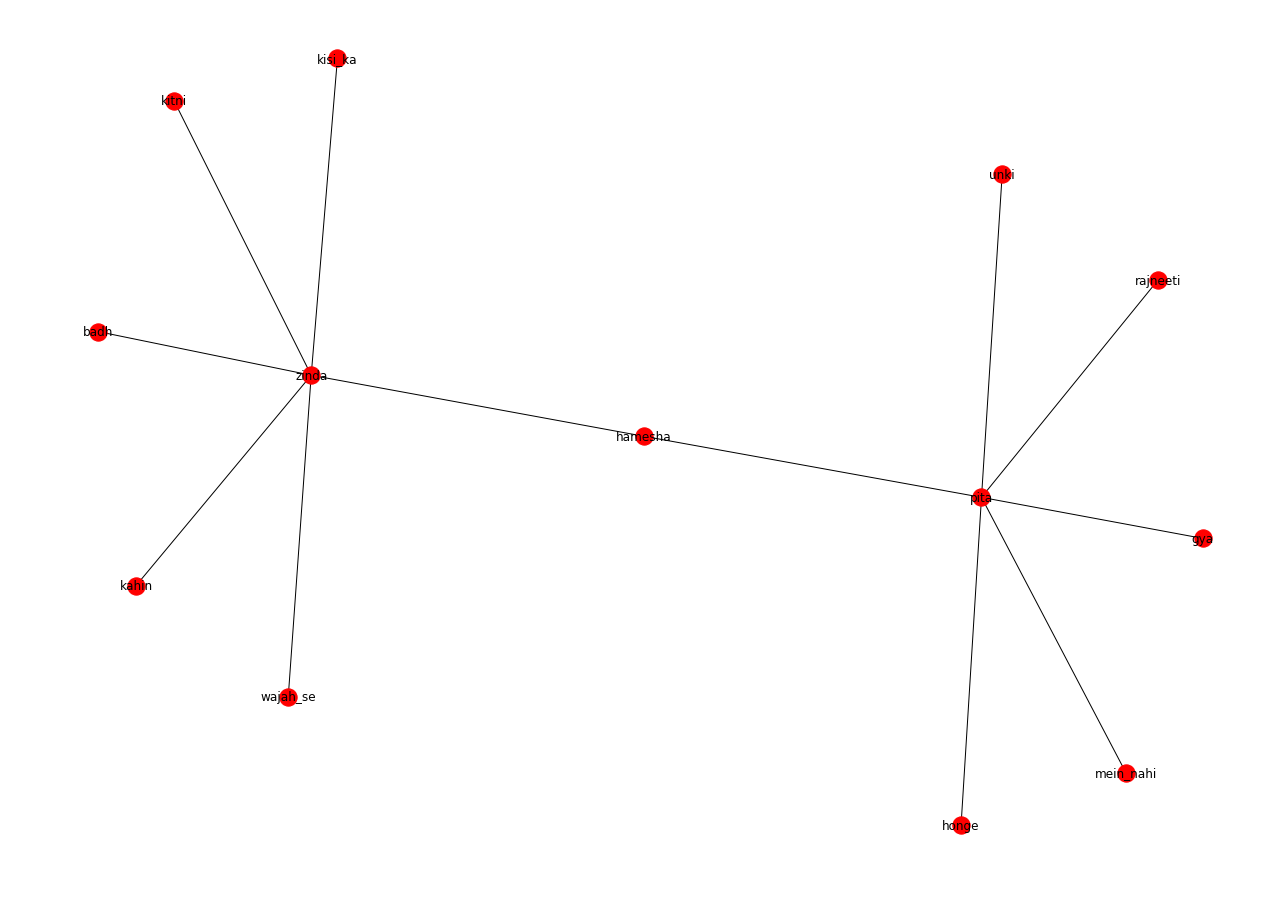

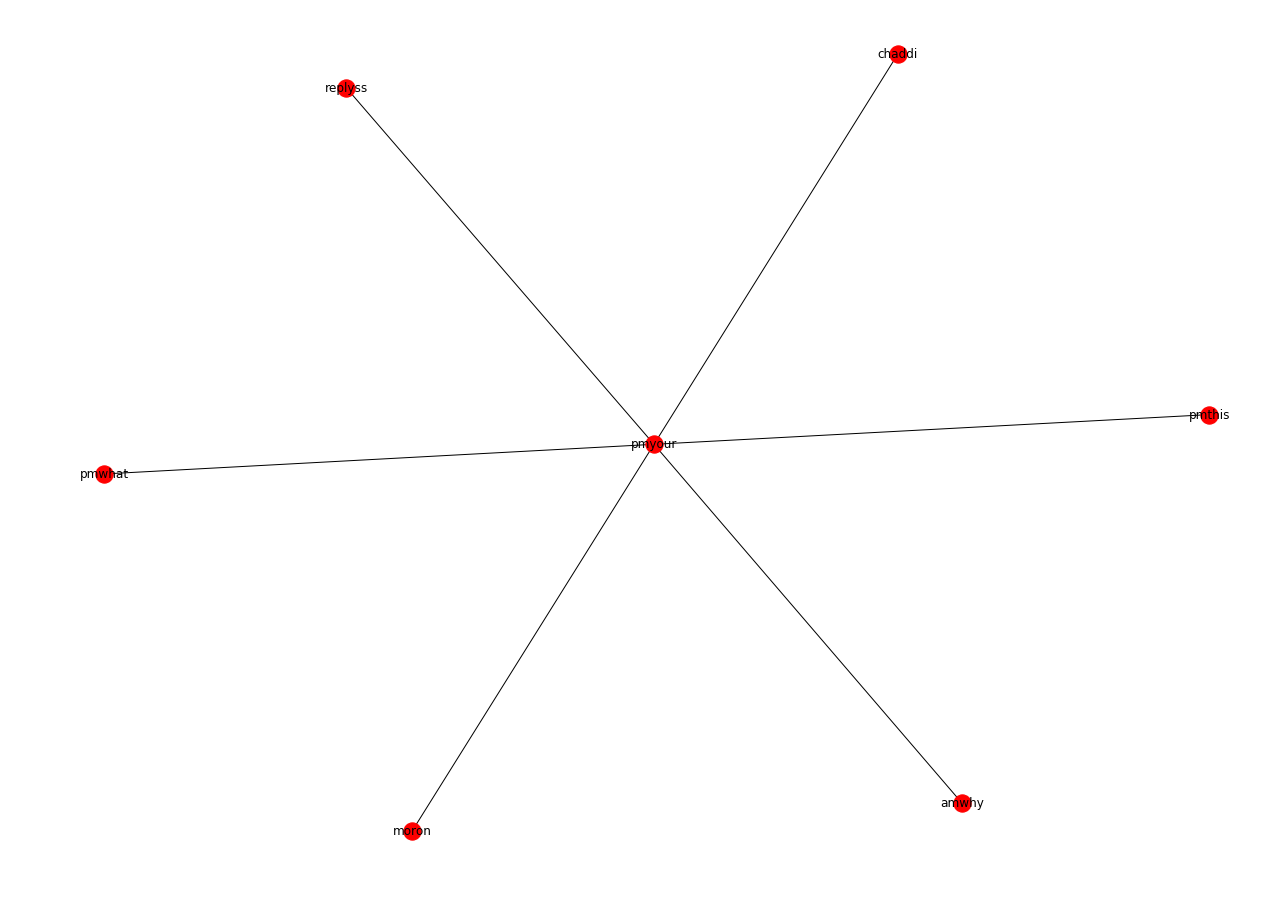

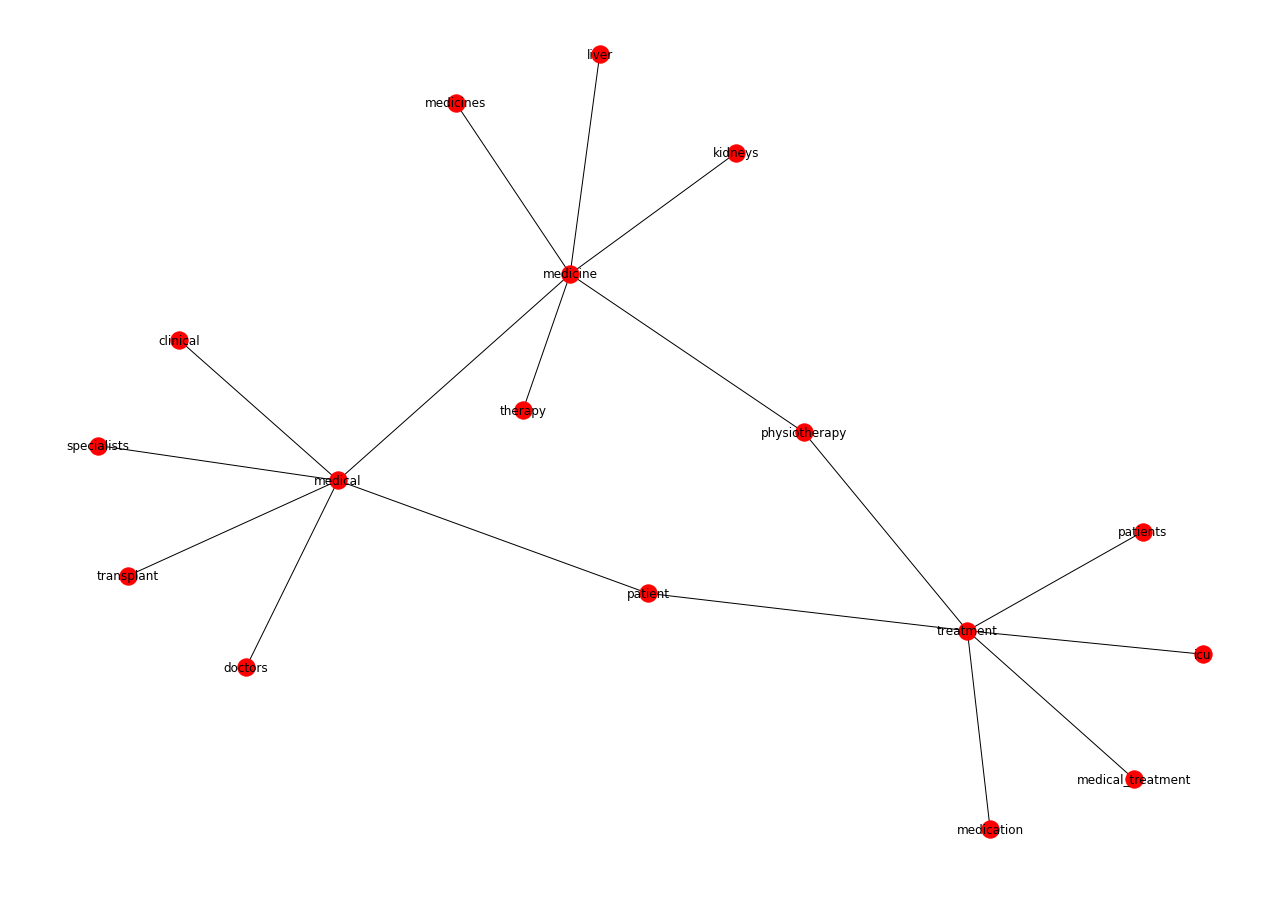

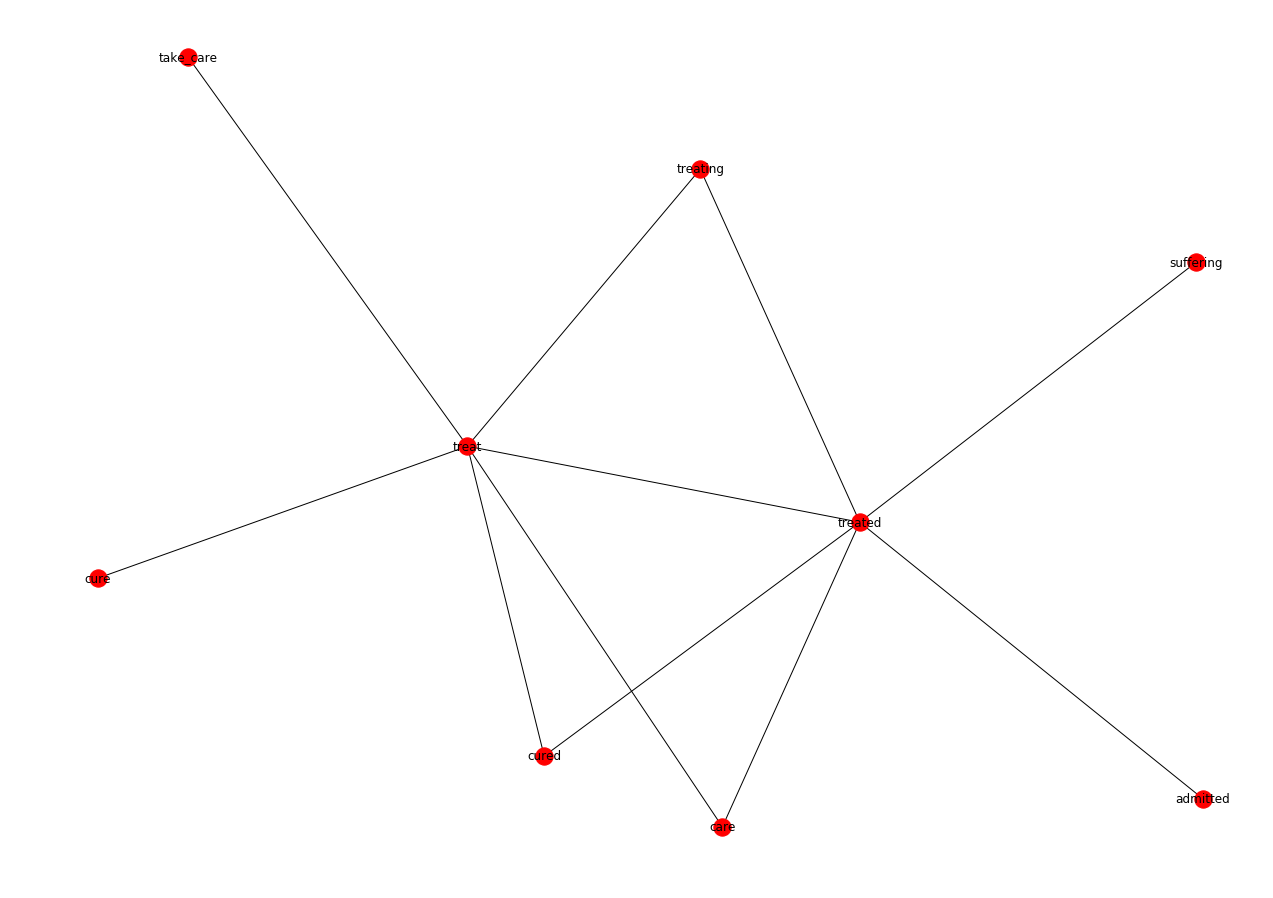

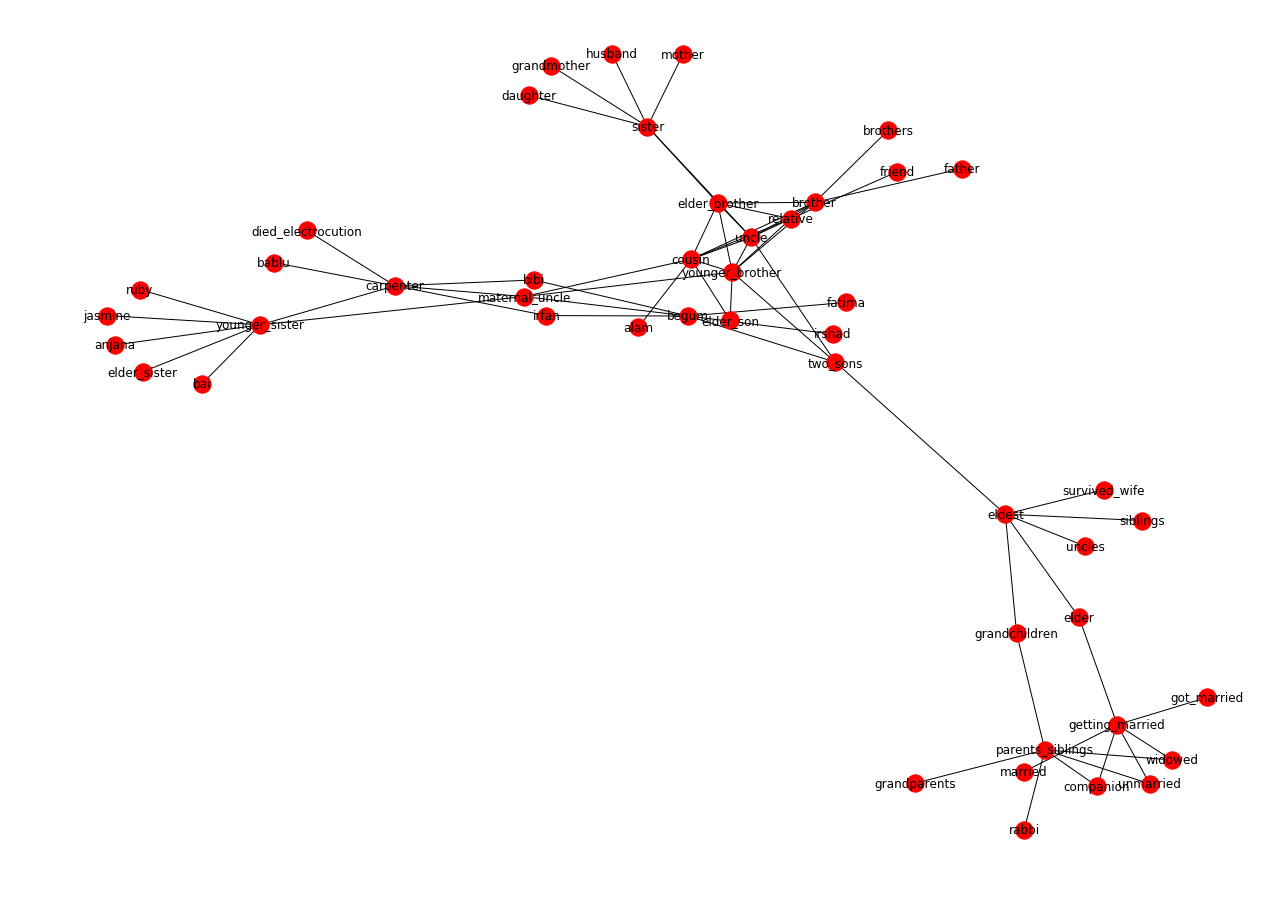

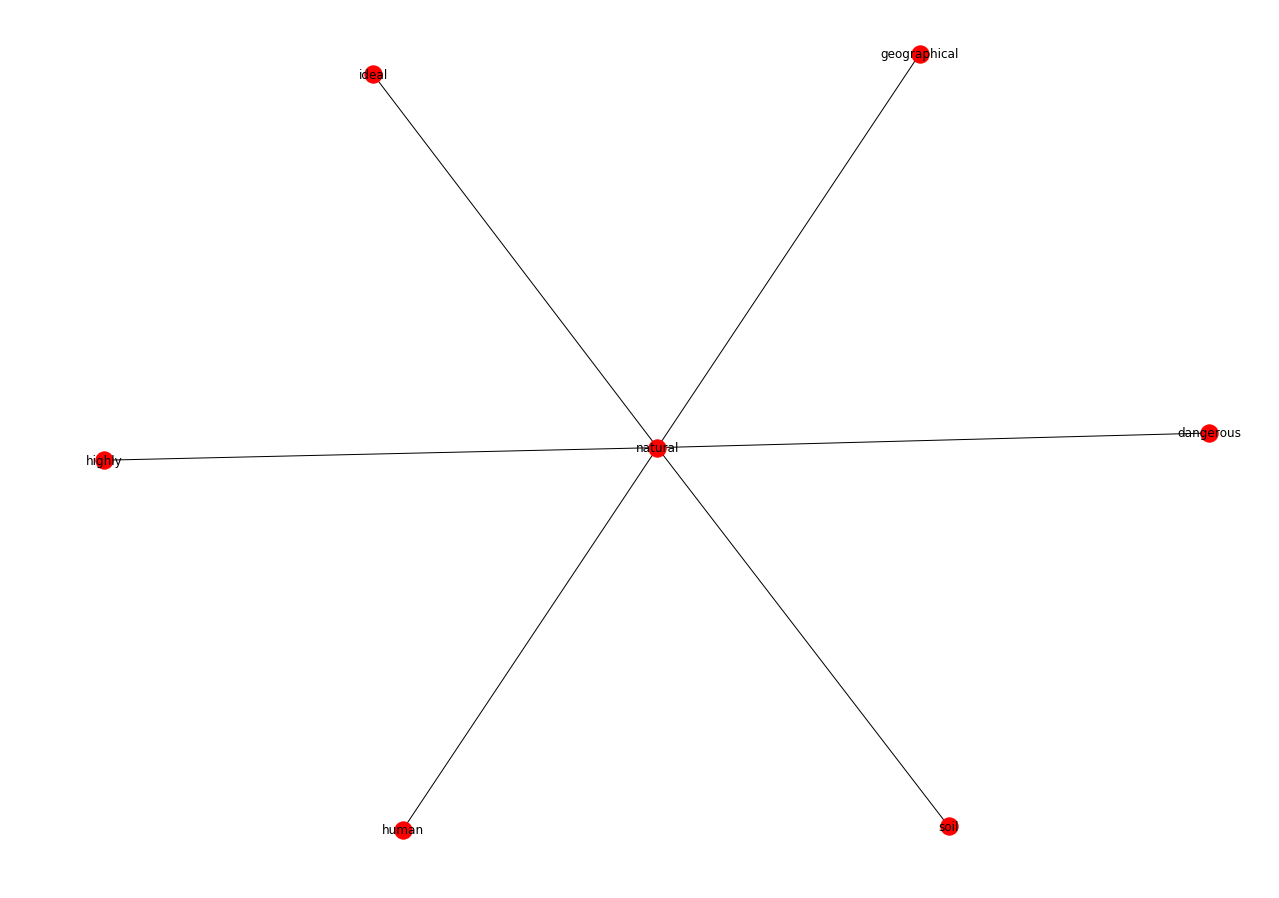

In [30]:
for gt1 in topics:
    nx.draw(gt1, with_labels=True)
    plt.show()

In [33]:
cliques4 = [x for x in nx.clique.find_cliques(g1) if len(x)==4]
nodes4 = set(n for clq in cliques4 for n in clq)
h4 = g1.subgraph(nodes4)
len(nodes4)
#nodes4 = 

17

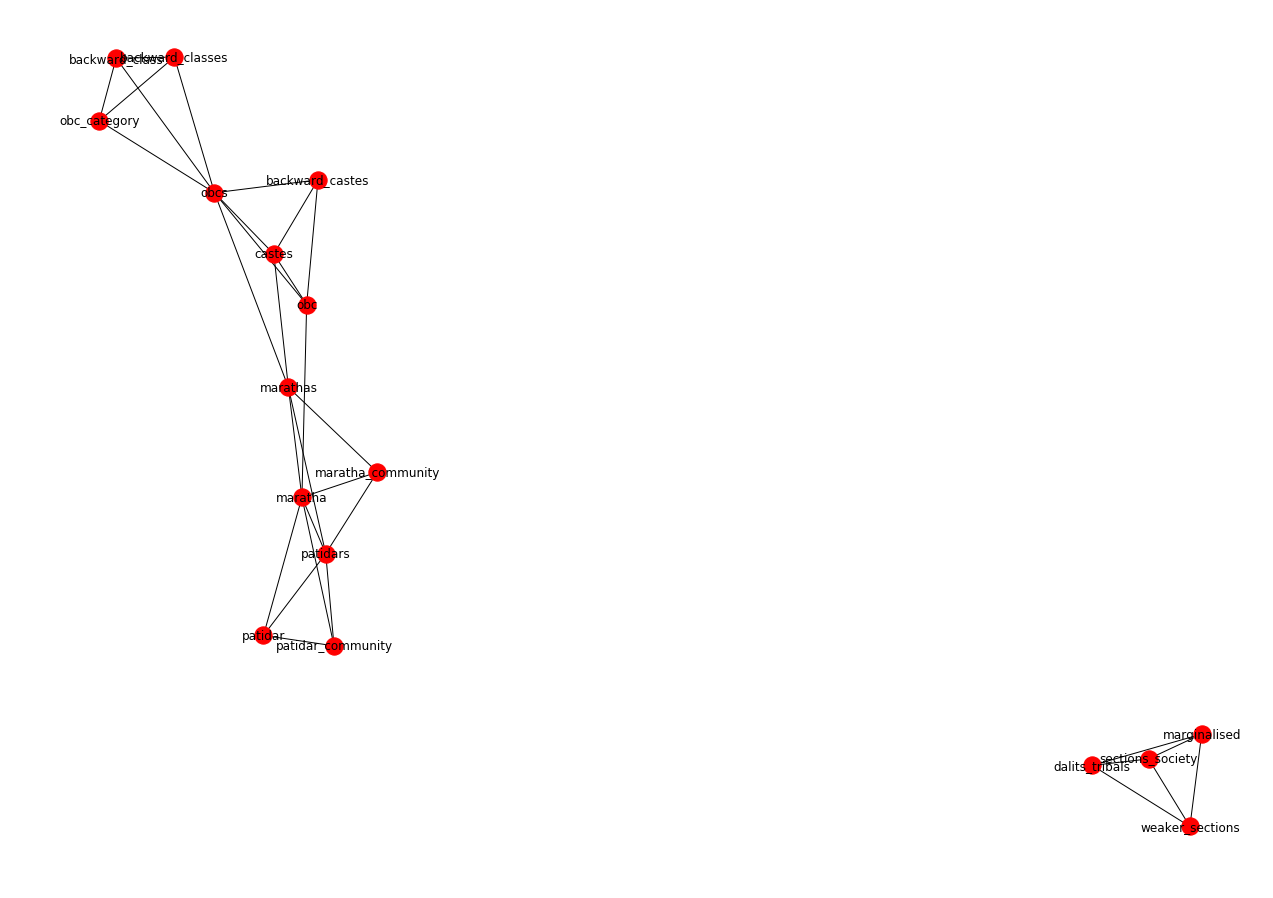

In [34]:
nx.draw(h4, with_labels=True)
plt.show()

In [35]:
cliques3 = [x for x in nx.clique.find_cliques(g1) if len(x)==3]
nodes3 = set(n for clq in cliques3 for n in clq)
h3 = g1.subgraph(nodes3)
len(nodes3)

56

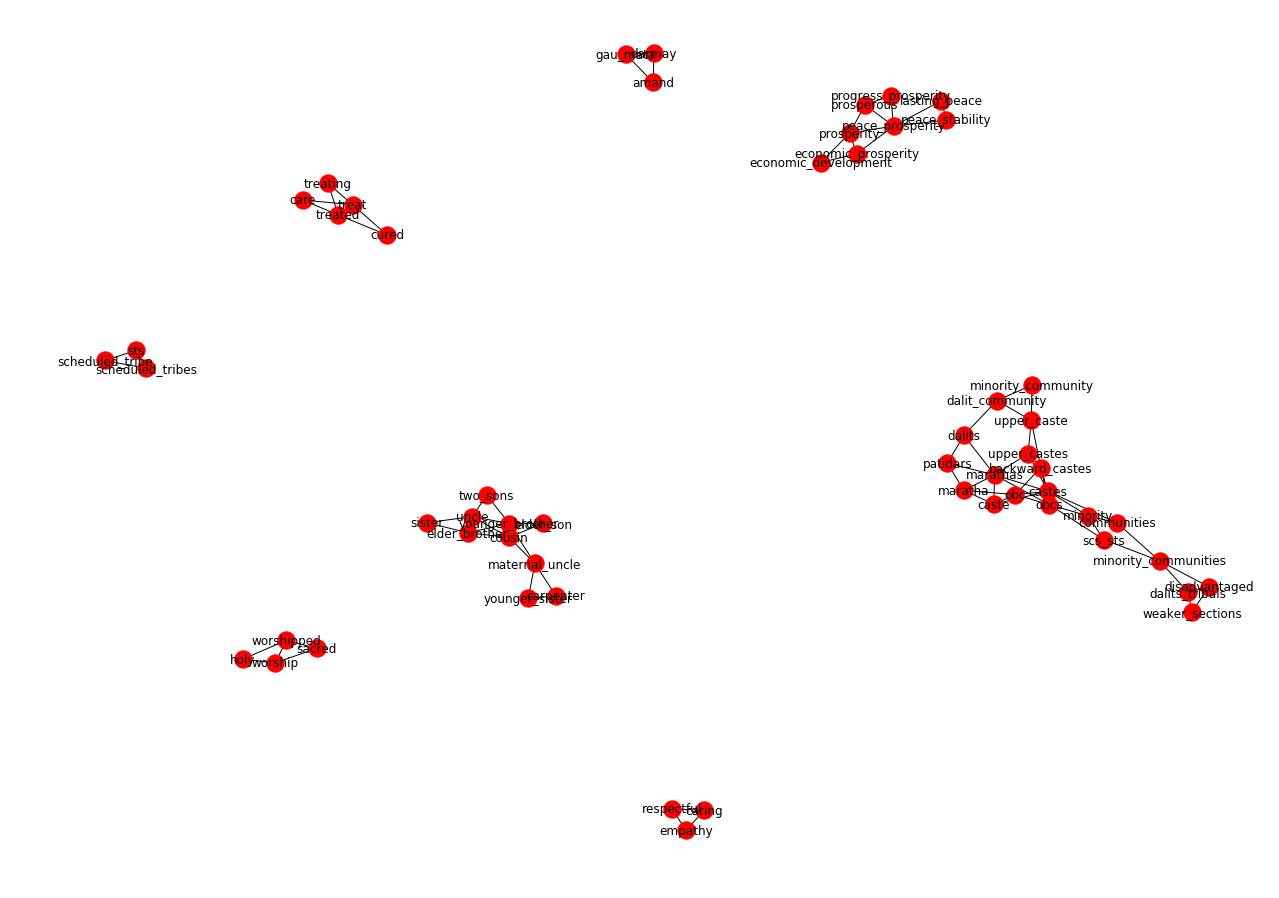

In [36]:
nx.draw(h3, with_labels=True)
plt.show()